In [46]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
file_list=glob.glob('*/*.out')
columns=["rows","nodes","threads","scatter time","gather time", "cal time", "total time", "message size"]
result_df=pd.DataFrame(columns=columns,dtype=np.float64)

In [48]:
for file in file_list:
    df_row={}
    file_name=file
    tmp_path=file_name.split('/')[0]
    df_row["rows"]=int(tmp_path.replace('n','').split('d')[0])
    file_name=file_name.split('/')[1]
    file_name=file_name.split('.')[0]
    file_name=file_name.replace('n','')
    file_name=file_name.replace('t','')
    file_name=file_name.split('_')
    df_row["nodes"]=int(file_name[0])
    df_row["threads"]=int(file_name[1])
    scatter_time=[]
    gather_time=[]
    cal_time=[]
    total_time=[]
    with open(file) as f:
        for line in f:
            if "Scatter" in line:
                scatter_time.append(float(line.split(' ')[-1]))
            if "Gather" in line:
                gather_time.append(float(line.split(' ')[-1]))
            if "Calculation" in line:
                cal_time.append(float(line.split(' ')[-1]))
            if "Total time" in line:
                total_time.append(float(line.split(' ')[-1]))
            if "Total message size" in line:
                df_row["message size"]=float(line.split(':')[1].replace('GB',''))
    df_row["scatter time"]=max(scatter_time)
    df_row["gather time"]=max(gather_time)
    df_row["cal time"]=max(cal_time)
    df_row["total time"]=max(total_time)
    result_df=result_df.append(df_row,ignore_index=True)
    

/tmp/ipykernel_2529798/3731511139.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df=result_df.append(df_row,ignore_index=True)
/tmp/ipykernel_2529798/3731511139.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df=result_df.append(df_row,ignore_index=True)
/tmp/ipykernel_2529798/3731511139.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df=result_df.append(df_row,ignore_index=True)
/tmp/ipykernel_2529798/3731511139.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df=result_df.append(df_row,ignore_index=True)
/tmp/ipykernel_2529798/3731511139.py:33: FutureWarning: The frame.append method is d

In [49]:
rows=list(result_df["rows"].unique())
rows.sort()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'Weak Scaling')

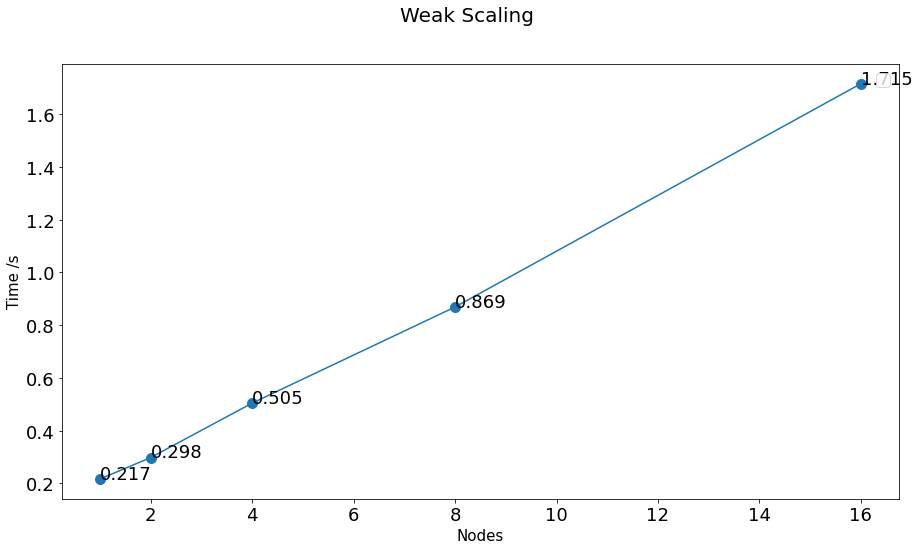

In [50]:
tempdf=result_df[(result_df["rows"]/result_df["nodes"]==2048) & (result_df["threads"]==1)]
tempdf=tempdf.sort_values(by=['nodes'])
xdata=tempdf["nodes"]
ydata=tempdf["total time"]
fig,ax=plt.subplots(1,1,figsize=(15,8)) # figure size
plt.rcParams.update({'font.size': 18}) # font size
label=""
data_frame=None

ax.plot(xdata,ydata,label=label,marker='o',markersize=10)
for i in range(len(xdata)):
    ax.annotate('%.3f'%list(ydata)[i], (list(xdata)[i], list(ydata)[i]))
ax.legend()
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.set_ylabel("Time /s",fontsize=15) # y labels
ax.set_xlabel("Nodes",fontsize=15) # x labels
plt.suptitle("Weak Scaling",fontsize=20) # title

Text(0.5, 0.98, 'Strong Scaling')

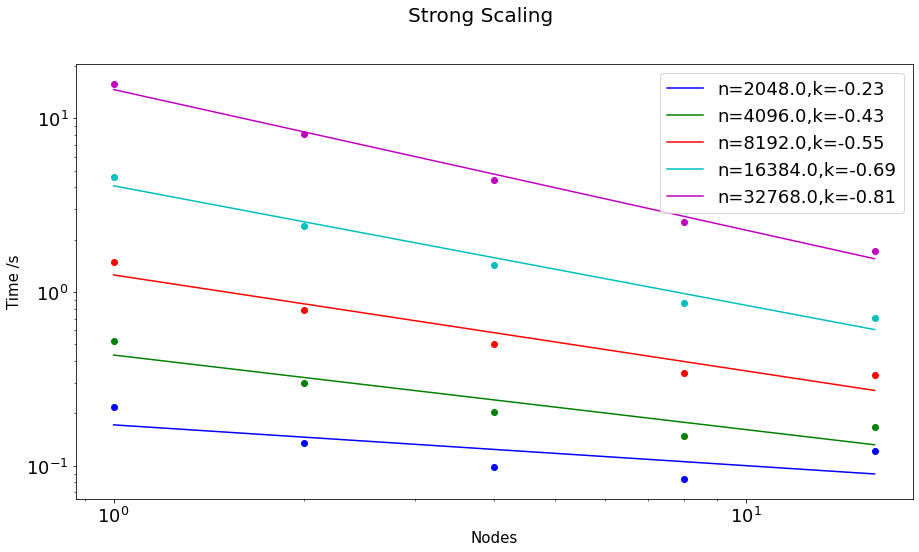

In [51]:
cmap=['b','g','r','c','m','y','k','blueviolet','chartreuse']
def fit(ax_,xdata,ydata,cmap_,label,cindex_):
    degree=1    
    logx = np.log(xdata)
    logy = np.log(ydata)
    coeffs = np.polyfit(logx,logy,deg=degree)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(np.log(x)))
    label_=label
    ax_.scatter(xdata,ydata,color=cmap_[cindex_])
    label_=label+",k="+str("%.2f" % coeffs[degree-1])
    ax_.plot(xdata,yfit(xdata),label=label_,color=cmap_[cindex_])
    # ax_.plot(xdata,ydata,color=cmap_[cindex_])
    # for i in range(len(xdata)):
    #     ax_.annotate('%.1f'%ydata[i], (xdata[i], ydata[i]))
fig,ax=plt.subplots(1,1,figsize=(15,8)) # figure size
plt.rcParams.update({'font.size': 18}) # font size
for i in range(len(rows)):
    tempdf=result_df[(result_df["rows"]==rows[i])& (result_df["threads"]==1)]
    tempdf=tempdf.sort_values(by=['nodes'])
    xdata=tempdf["nodes"]
    ydata=tempdf["total time"]    
    label="n="+str(rows[i])
    fit(ax,xdata,ydata,cmap,label,i)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.set_ylabel("Time /s",fontsize=15) # y labels
ax.set_xlabel("Nodes",fontsize=15) # x labels
plt.suptitle("Strong Scaling",fontsize=20) # title

Text(0.5, 0.98, 'Communication time')

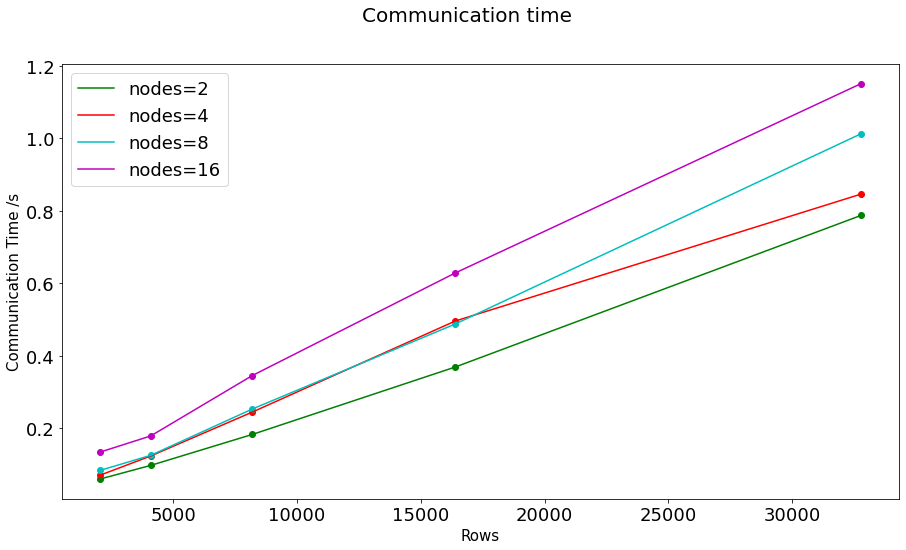

In [54]:
cmap=['b','g','r','c','m','y','k','blueviolet','chartreuse']
nodes=[1,2,4,8,16]
def fit(ax_,xdata,ydata,cmap_,label,cindex_):
    degree=1    
    logx = np.log(xdata)
    logy = np.log(ydata)
    coeffs = np.polyfit(logx,logy,deg=degree)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(np.log(x)))
    label_=label
    ax_.scatter(xdata,ydata,color=cmap_[cindex_])
    label_=label
    # ax_.plot(xdata,yfit(xdata),label=label_,color=cmap_[cindex_])
    ax_.plot(xdata,ydata,color=cmap_[cindex_],label=label_)
    # for i in range(len(xdata)):
    #     ax_.annotate('%.1f'%ydata[i], (xdata[i], ydata[i]))
fig,ax=plt.subplots(1,1,figsize=(15,8)) # figure size
plt.rcParams.update({'font.size': 18}) # font size
for i in range(1,len(nodes)):
    tempdf=result_df[(result_df["nodes"]==nodes[i])& (result_df["threads"]==1)]
    tempdf=tempdf.sort_values(by=['rows'])
    xdata=tempdf["rows"]
    ydata=tempdf["scatter time"]+tempdf["gather time"]  
    label="nodes="+str(nodes[i])
    fit(ax,xdata,ydata,cmap,label,i)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.legend()
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.set_ylabel("Communication Time /s",fontsize=15) # y labels
ax.set_xlabel("Rows",fontsize=15) # x labels
plt.suptitle("Communication time",fontsize=20) # title